# Contingency Tables

So far, we have introduced basic distributions for discrete random variables &mdash; our first _models_! But a model of a single discrete random variable isn't all that interesting... Contingency tables allow us to model and reason about the joint distribution of _two_ categorical random variables. Two might not sound like a lot, but it turns out plenty of important questions boil down to understanding the relationship between two variables.


## Demo: College Football Playoffs
Let's start with a little demo. The College Football Playoffs are underway, and the Super Bowl is coming up in a few weeks! If you go to a watch party, you might like to play the following game with your friends. Before the football game starts, create a 10x10 board with the rows and columns numbered 0 through 9. Each cell represents a possible final score of the home and away team, mod 10. You and your friends select cells in round robin order until all 100 cells are taken. Whoever has the cell with the final score (mod 10) wins! 

Let's play together, using the upcoming Cotton Bowl between Ohio State and Texas as our example. Fill out [this poll](https://docs.google.com/forms/d/e/1FAIpQLSec3E2Wi8h5YyxVtnxrbgDH2nnN7XRt5MzJB-xtzUHhvZBChg/viewform?usp=sharing) to enter your guess.


The final scores (mod 10) are discrete random variables! 

Let's look at some data from this season and see if we can make an informed prediction.

In [1]:
# Setup
import torch 
from torch.distributions import Chi2, Multinomial
import matplotlib.pyplot as plt
import pandas as pd

/Users/scott/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Poll Results

In [2]:
responses = pd.read_csv("https://docs.google.com/spreadsheets/d/1dAOhartEFTZ7fKde8CkRnaWNah1ikFssRpWMyy5FcqA/export?format=csv")
responses.head(1)

Timestamp             Name Net ID  \
0  1/4/2025 13:40:46  Scott Linderman   swl1   

  Are you comfortable programming in Python? Have you used PyTorch before?  \
0                                        Yes                           Yes   

   How many points (mod 10) do you think the Ohio State Buckeyes will score in the Cotton Bowl Friday Night?  \
0                                                  4                                                           

   How many points (mod 10) do you think the Texas Longhorns will score in the Cotton Bowl Friday Night?  
0                                                  7

In [3]:
predicted_scores = torch.tensor(responses[responses.columns[-2:]].values, dtype=torch.float32)
predicted_hist = torch.histogramdd(predicted_scores, bins=10, range=[0, 10, 0, 10], density=True)

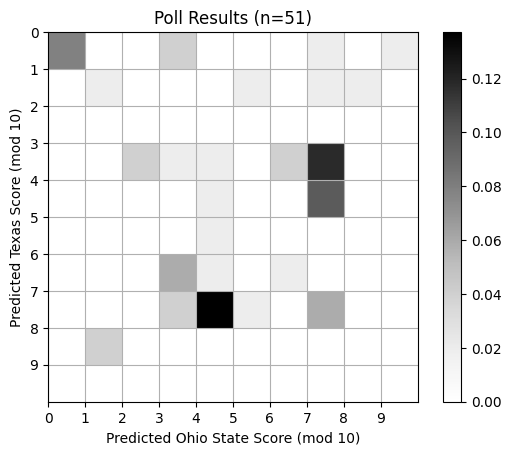

In [4]:
# Plot the histogram
plt.imshow(predicted_hist.hist, extent=(0, 10, 10, 0), cmap="Greys")
plt.xticks(torch.arange(10))
plt.yticks(torch.arange(10))
plt.xlabel("Predicted Ohio State Score (mod 10)")
plt.ylabel("Predicted Texas Score (mod 10)")
plt.title(f"Poll Results (n={len(predicted_scores)})")
plt.grid(True)
_ = plt.colorbar()

### Compare to Actual Scores

Now let's compare to actual scores from the 2023 season. This data is from [https://collegefootballdata.com/](https://collegefootballdata.com/).

In [6]:
allgames = pd.read_csv("https://raw.githubusercontent.com/slinderman/stats305b/winter2024/data/01_allgames.csv")
allgames.head(10)

Id  Season  Week Season Type                Start Date  \
0  401550883    2023     1     regular  2023-08-26T17:00:00.000Z   
1  401525434    2023     1     regular  2023-08-26T18:30:00.000Z   
2  401540199    2023     1     regular  2023-08-26T19:30:00.000Z   
3  401520145    2023     1     regular  2023-08-26T21:30:00.000Z   
4  401525450    2023     1     regular  2023-08-26T23:00:00.000Z   
5  401532392    2023     1     regular  2023-08-26T23:00:00.000Z   
6  401540628    2023     1     regular  2023-08-26T23:00:00.000Z   
7  401520147    2023     1     regular  2023-08-26T23:30:00.000Z   
8  401539999    2023     1     regular  2023-08-26T23:30:00.000Z   
9  401523986    2023     1     regular  2023-08-27T00:00:00.000Z   

   Start Time Tbd  Completed  Neutral Site  Conference Game  Attendance  ...  \
0           False       True         False            False         NaN  ...   
1           False       True          True            False     49000.0  ...   
2           False       True          True            False         NaN  ...   
3           False       True         False             True     17982.0  ...   
4           False       True         False            False     15356.0  ...   
5           False       True         False            False     23867.0  ...   
6           False       True         False            False         NaN  ...   
7           False       True         False            False     21407.0  ...   
8           False       True          True            False         NaN  ...   
9           False       True         False            False     63411.0  ...   

     Away Conference Away Division  Away Points Away Line Scores  \
0                NaN           NaN          NaN              NaN   
1  American Athletic           fbs          3.0              NaN   
2                UAC           fcs          7.0              NaN   
3     Conference USA           fbs         14.0              NaN   
4   FBS Independents           fbs         41.0              NaN   
5       Mid-American           fbs         13.0              NaN   
6            Patriot           fcs         13.0              NaN   
7      Mountain West           fbs         28.0              NaN   
8               MEAC           fcs          7.0              NaN   
9      Mountain West           fbs         28.0              NaN   

  Away Post Win Prob Away Pregame Elo  Away Postgame Elo  Excitement Index  \
0                NaN              NaN                NaN               NaN   
1           0.001042           1471.0             1385.0          1.346908   
2           0.025849              NaN                NaN          6.896909   
3           0.591999           1369.0             1370.0          6.821333   
4           0.760751           1074.0             1122.0          5.311493   
5           0.045531           1482.0             1473.0          6.547378   
6           0.077483              NaN                NaN          5.608758   
7           0.819154           1246.0             1241.0          5.282033   
8           0.001097              NaN                NaN          3.122344   
9           0.001769           1462.0             1412.0          1.698730   

   Highlights  Notes  
0         NaN    NaN  
1         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
4         NaN    NaN  
5         NaN    NaN  
6         NaN    NaN  
7         NaN    NaN  
8         NaN    NaN  
9         NaN    NaN  

[10 rows x 33 columns]

In [7]:
past_scores = torch.tensor(allgames[["Home Points", "Away Points"]].values, dtype=torch.float32)
past_hist = torch.histogramdd(past_scores % 10, bins=10, range=[0, 10, 0, 10], density=True)

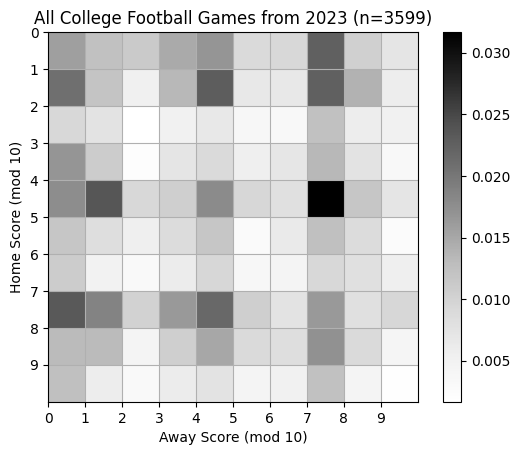

In [8]:
# Plot the histogram
plt.imshow(past_hist.hist, extent=(0, 10, 10, 0), cmap="Greys")
plt.xticks(torch.arange(10))
plt.yticks(torch.arange(10))
plt.xlabel("Away Score (mod 10)")
plt.ylabel("Home Score (mod 10)")
plt.title(f"All College Football Games from 2023 (n={len(past_scores)})")
plt.grid(True)
_ = plt.colorbar()


## Contingency Tables

The table above is an example of a **contingency table**. It represents a sample from a **joint distribution** of two random variables, $X, Y \in \{0,1,\ldots, 10\}$ indicating the two scores, mod 10.

More generally, let $X \in \{1,\ldots, I\}$ and $Y \in \{1,\ldots, J\}$ be categorical random variables. We represent the joint distribution as an $I \times J$ table,
\begin{align*}
\mbPi = \begin{bmatrix}
\pi_{11} & \ldots & \pi_{1J} \\
\vdots & & \vdots \\
\pi_{I1} & \ldots & \pi_{IJ}
\end{bmatrix}
\end{align*}
where
\begin{align*}
\pi_{ij} = \Pr(X = i, Y = j).
\end{align*}
The probabilities must be normalized,
\begin{align*}
1 = \sum_{i=1}^I \sum_{j=1}^J \pi_{ij} \triangleq \pi_{\bullet \bullet}
\end{align*}
The **marginal probabilities** are given by,
\begin{align*}
\Pr(X = i) &= \sum_{j=1}^J \pi_{ij} \triangleq \pi_{i \bullet}, \\
\Pr(Y = j) &= \sum_{i=1}^I \pi_{ij} \triangleq \pi_{\bullet j}.
\end{align*}
Finally, the conditional probabilities are given by Bayes' rule,
\begin{align*}
\Pr(Y =j \mid X=i) &= \frac{\Pr(X=i, Y=j)}{\Pr(X=i)} = \frac{\pi_{ij}}{\pi_{i \bullet}} \triangleq \pi_{j | i}
\end{align*}


## Comparing Two Proportions

Contingency tables are often used to compare two groups $X \in \{0,1\}$ based on a binary response variables $Y \in \{0,1\}$. The resulting tables are 2x2. The association between $X$ and $Y$ can be summarized with a variety of statistics: the difference of proportions, the relative risk, and the odds ratio. We will focus on the latter.

For a Bernoulli random variable with probability $p$, the odds are defined as 
\begin{align*}
\Omega = \frac{p}{1 - p}. 
\end{align*}
Inversely, $p = \frac{\Omega}{\Omega + 1}$.

For a 2x2 table, each row defines a Bernoulli conditional,
\begin{align*}
Y \mid X=i &\sim \mathrm{Bern}(\pi_{1|i}) & \text{for } i &\in \{0,1\},
\end{align*}
where, recall, 
\begin{align*}
\pi_{1|i} = \frac{\pi_{i1}}{\pi_{i0} + \pi_{i1}}.
\end{align*}
The odds for row $i$ are,
\begin{align*}
\Omega_i = \frac{\pi_i}{1 - \pi_i} 
= \frac{\pi_{i1}}{\pi_{i0}}.
\end{align*}

The _odds ratio_ $\theta$ is exactly what it sounds like, 
\begin{align*}
\theta 
&= \frac{\Omega_1}{\Omega_0} 
= \frac{\pi_{11} \pi_{00}}{\pi_{10} \pi_{01}}
\end{align*}

The odds ratio is non-negative, $\theta \in \reals_+$. When $X$ and $Y$ are independent, the homogeneity of conditionals implies that $\pi_{1|1} = \pi_{1|0}$ and $\pi_{0|1} = \pi_{0|0}$. In turn, $\Omega_1 = \Omega_0$ so that the odds ratio, $\theta$, is one.

For inference it is often more convenient to work with the _log odds ratio_,
\begin{align*}
\log \theta &= \log \pi_{11} + \log \pi_{00} - \log \pi_{10} - \log \pi_{01}.
\end{align*}
Under independence, the log odds ratio is 0. The magnitude of the log odds ratio represents the strength of association. 

## Confidence Intervals for Log Odds Ratio 

Given a sample of counts $\mbX=\mbx$ from a contingency table, the MLE estimate of the probabilities is
\begin{align*}
\hat{\pi}_{ij} &= \frac{x_{ij}}{x_{\bullet \bullet}}
\end{align*}
For a 2x2 table, the sample estimate of log odds ratio is,
\begin{align*}
\log \hat{\theta} &= \log \frac{\hat{\pi}_{11} \hat{\pi}_{00}}{\hat{\pi}_{10} \hat{\pi}_{01}} 
= \log \frac{x_{11} x_{00}}{x_{10} x_{01}}.
\end{align*}

We can estimate 95% Wald confidence intervals usign the asymptotic normality of the estimator,
\begin{align*}
\log \hat{\theta} \pm 1.96 \, \hat{\sigma}(\log \hat{\theta})
\end{align*}
where
\begin{align*}
\hat{\sigma}(\log \hat{\theta})
&= \left(\frac{1}{x_{11}} + \frac{1}{x_{00}} + \frac{1}{x_{10}} + \frac{1}{x_{01}} \right)^{\frac{1}{2}}
\end{align*}
is an estimate of the standard error using the _delta method_.

### Delta method
The sample log odds ratio is a nonlinear function of the maximum likelihood estimates of $\hat{\pi}_{ij}$,
\begin{align*}
\hat{\pi}_{ij} &= \frac{x_{ij}}{n}.
\end{align*}
where $n = x_{\bullet \bullet} = \sum_{ij} x_{ij}$.

Let $\hat{\mbpi} = \mathrm{vec}(\hat{\mbPi}) = (\hat{\pi}_{11}, \hat{\pi}_{10}, \hat{\pi}_{01}, \hat{\pi}_{00})$ denote the vector of probability estimates. 

The MLE is asymptotically normal with variance given by the inverse Fisher information,
\begin{align*}
\sqrt{n}(\hat{\mbpi} - \mbpi) \to \mathrm{N}(0, \cI(\mbpi)^{-1}) 
\end{align*}
where
\begin{align*}
\cI(\mbpi)^{-1} 
&= 
\begin{bmatrix}
\pi_{11}(1-\pi_{11}) & -\pi_{11} \pi_{10} & - \pi_{11} \pi_{01} & -\pi_{11} \pi_{00} \\
-\pi_{10} \pi_{11} & \pi_{10} (1 - \pi_{10}) & - \pi_{10} \pi_{01} & -\pi_{10} \pi_{00} \\
-\pi_{01} \pi_{11} & -\pi_{01} \pi_{10} & \pi_{01} (1 - \pi_{01}) & -\pi_{01} \pi_{00} \\
-\pi_{00} \pi_{11} & -\pi_{00} \pi_{10} & -\pi_{00} \pi_{01} & \pi_{00} (1 - \pi_{00})
\end{bmatrix}
\end{align*}
The (multivariate) delta method is a way of estimating the variance of a scalar function of the estimator, $g(\hat{\mbpi})$. Using a first order Taylor approximation around the true probabilities,
\begin{align*}
g(\hat{\mbpi}) &\approx g(\mbpi) + \nabla g(\mbpi)^\top (\hat{\mbpi} - \mbpi)
\end{align*}
we can derive the approximate variance as,
\begin{align*}
\Var[g(\hat{\mbpi})] 
&\approx 
\Var[\nabla g(\mbpi)^\top \hat{\mbpi}] 
= \nabla g(\mbpi)^\top \Cov[\hat{\mbpi}] \nabla g(\mbpi).
\end{align*}
Then, the estimate of $g(\mbpi)$ is asymptotically normal as well, and its variance depends on the gradient of $g$,
\begin{align*}
\sqrt{n}(g(\hat{\mbpi}) - g(\mbpi)) \to \mathrm{N}(0, \nabla g(\mbpi)^\top \cI(\mbpi)^{-1} \nabla g(\mbpi)) 
\end{align*}

For the log odds ratio, $g(\mbpi) = \log \pi_{11} + \log \pi_{00} - \log \pi_{10} - \log \pi_{01}$ and 
\begin{align*}
\nabla g(\mbpi) &= \begin{pmatrix}
1 / \pi_{11} \\ -1 / \pi_{10} \\ -1 / \pi_{01} \\ 1 / \pi_{00} 
\end{pmatrix}.
\end{align*} 
Substituting this into the expression for the asymptotic variance yields,
\begin{align*}
\nabla g(\mbpi)^\top \cI(\mbpi)^{-1} \nabla g(\mbpi)
&= \sum_{ij} [\cI(\mbpi)^{-1}]_{ij} \cdot [\nabla g(\mbpi)]_i \cdot [\nabla g(\mbpi)]_j \\
&= \frac{1}{\pi_{11}} + \frac{1}{\pi_{00}} + \frac{1}{\pi_{10}} + \frac{1}{\pi_{01}}.
\end{align*}
Of course, we don't know $\mbpi$. Plugging in the estimates $\hat{\pi}_{ij} = x_{ij} / n$ yields the Wald standard error,
\begin{align*}
\hat{\sigma}(\log \hat{\theta}) 
&= \left(\frac{\nabla g(\hat{\mbpi})^\top \cI(\hat{\mbpi})^{-1} \nabla g(\hat{\mbpi})}{n} \right)^{\frac{1}{2}} \\
&= \left(\frac{1}{x_{11}} + \frac{1}{x_{00}} + \frac{1}{x_{10}} + \frac{1}{x_{01}} \right)^{\frac{1}{2}},
\end{align*}
as shown above.


## Independence

One of the key questions in the analysis of contingency tables is whether $X$ and $Y$ are independent. In particular, they are independent if the joint distribution factors into a product of marginals,
\begin{align*}
X \perp Y \iff \pi_{ij} = \pi_{i \bullet} \pi_{\bullet j} \; \forall i,j.
\end{align*}

Equivalently, the variables are independent if the conditionals are _homogeneous_,
\begin{align*}
X \perp Y \iff \pi_{j|i} = \frac{\pi_{ij}}{\pi_{i \bullet}} = \frac{\pi_{i \bullet} \pi_{\bullet j}}{\pi_{i \bullet}} = \pi_{\bullet j} \; \forall i,j.
\end{align*}


## Independence Testing in Multi-Way Tables
Here, we will derive a likelihood ratio test to test for independence in a contingency table. Let $\cH_0: \pi_{ij} = \pi_{i \bullet} \pi_{\bullet j}$ for all $i,j$ be our null hypothesis of independence. The null hypothesis imposes a constraint on the set of probabilities $\mbPi$. Rather than taking on any value $\mbPi \in \Delta_{IJ - 1}$, they are constrained to the $\Delta_{I-1} \times \Delta_{J-1}$ subset of probabilities that factor into an outer product of marginal probabilities. 

The likelihood ratio test compares the maximum likelihood under the constrained set to the maximum likelihood under the larger space of all probabilities,
\begin{align*}
\lambda &= 
-2 \log \frac
{
    \sup_{\mbpi_{i \bullet}, \mbpi_{\bullet j} \in \Delta_{I-1} \times \Delta_{J-1}} p(\mbx; \mbpi_{i \bullet} \mbpi_{\bullet j}^\top)
}
{
    \sup_{\mbPi \in \Delta_{IJ-1}} p(\mbx; \mbPi)
}
\end{align*}
The maximum likelihoods estimates of the constrained model are $\hat{\pi}_{i \bullet} = x_{i \bullet} / x_{\bullet \bullet}$ and $\hat{\pi}_{\bullet j} = x_{\bullet j} / x_{\bullet \bullet}$; under the unconstrained model they are $\hat{\pi}_{ij} = x_{ij} / x_{\bullet \bullet}$. Plugging these estimates in yields,
\begin{align*}
\lambda &= 
-2 \log \frac
{
    \prod_{ij} \left( \frac{x_{i \bullet} x_{\bullet j}}{x_{\bullet \bullet}^2} \right)^{x_{ij}}
}
{
    \prod_{ij} \left( \frac{x_{i j}}{x_{\bullet \bullet}} \right)^{x_{ij}}
} \\
&= -2 \sum_{ij} x_{ij} \log \frac{\hat{\mu}_{ij}}{x_{ij}}
\end{align*}
where $\hat{\mu}_{ij} = x_{\bullet \bullet} \hat{\pi}_{i \bullet} \hat{\pi}_{\bullet j} = x_{i \bullet} x_{\bullet j} / x_{\bullet \bullet}$ is the expected value of $X_{ij}$ under the null hypothesis of independence.

Under the null hypothesis, $\lambda$ is asymptotically distributed as chi-squared with $(IJ -1) - (I-1) - (J-1) = (I-1)(J-1)$ degrees of freedom,
\begin{align*}
\lambda \sim \chi^2_{(I-1)(J-1)},
\end{align*}
allowing us to construct p-values.

### Example: Home and Away Scores

As an example, let's test for independence of home and away scores (mod 10) using the 2023 data.

In [40]:
# Compute the empirical marginals
def compute_lr_stat(X):
    pi_i = X.sum(1) / X.sum()
    pi_j = X.sum(0) / X.sum()
    mu = X.sum() * pi_i[:, None] * pi_j[None, :]
    lmbda = -2 * torch.sum(X * (torch.log(mu) - torch.log(X + 1e-8)))
    return lmbda, mu

X = torch.histogramdd(past_scores % 10, bins=10, range=[0, 10, 0, 10], density=False).hist
lmbda, mu = compute_lr_stat(X)

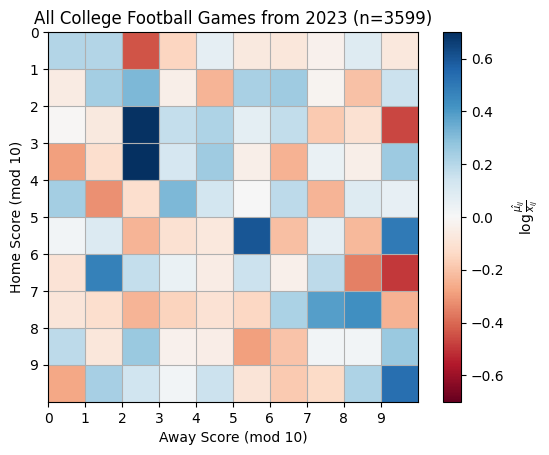

In [41]:
# Plot the histogram
plt.imshow(torch.log(mu / X), extent=(0, 10, 10, 0), vmin=-.7, vmax=.7, cmap="RdBu")
plt.xticks(torch.arange(10))
plt.yticks(torch.arange(10))
plt.xlabel("Away Score (mod 10)")
plt.ylabel("Home Score (mod 10)")
plt.title(f"All College Football Games from 2023 (n={len(past_scores)})")
plt.grid(True)
_ = plt.colorbar(label=r"$\log \frac{\hat{\mu_{ij}}}{x_{ij}}$")

In [42]:
# Compare test statistic to a null in which the scores really are independent
pi_i = X.sum(1) / X.sum()
pi_j = X.sum(0) / X.sum()
Pi = pi_i[:, None] * pi_j[None, :]
assert torch.allclose(Pi.sum(), torch.tensor(1.0))

n_resamples = 10000
X_null = Multinomial(total_count=int(X.sum()), probs=Pi.view(-1)).sample((n_resamples,))
X_null = X_null.reshape((n_resamples,) + X.shape)
lmbda_null = torch.stack([compute_lr_stat(xx)[0] for xx in X_null])


Text(0, 0.5, '$p(\\lambda \\mid \\mathcal{H}_0)$')

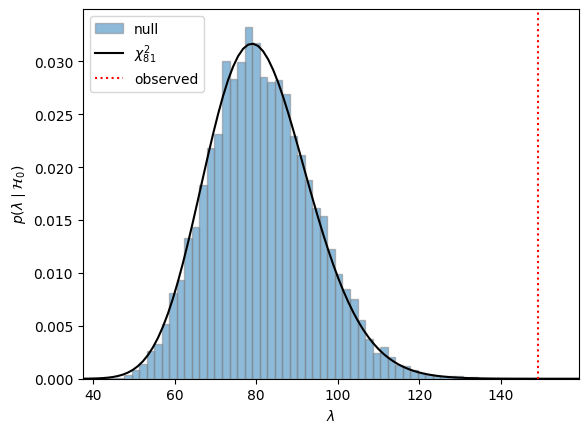

In [43]:
plt.hist(lmbda_null, bins=50, density=True, alpha=0.5, edgecolor='gray', label="null")
xmin, xmax = plt.xlim()
xmax = max(xmax, lmbda+10)
xs = torch.linspace(xmin, xmax, 100)
plt.plot(xs, Chi2(df=81).log_prob(xs).exp(), '-k', label=r"$\chi^2_{81}$")
plt.axvline(lmbda, color='r', linestyle=':', label="observed")
plt.xlim(xmin, xmax)
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$p(\lambda \mid \mathcal{H}_0)$')

## Conclusion

There is a lot more to say about contingency tables that we did not have time to cover. For two-way tables, there are other statistics for measuring association, like the _relative risk_. Likewise, in two-way tables, there are several ways to test for independence, including _Fisher's exact test_, which is based on a _hypergeometric sampling_ model. Next, we'll consider models for capturing relationships between a binary response and several covariates using _logistic regression_.
